# 💸 Tech-Salary-Prediction-by-Machine-Learning💰

## Welcome to my Capstone Project — Salary Prediction using Machine Learning.
### Predictive Modeling for finding salary in USD for techies in AI , Machine Learning and Data Science roles in the year 2020-2025 using Machine Learning Algorithms

###  Importing All the basic necessary Libraries 

In [84]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split

### 1️⃣ Stage 1 : Data Understanding & Cleaning

In [85]:
df=pd.read_csv('The AI, ML, Data Science Salary (2020- 2025).csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M


In [86]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
88579,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
88580,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
88581,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
88582,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
88583,2021,SE,FT,Data Scientist,7000000,INR,94665,IN,50,IN,L


In [87]:
## Dropping unwanted columns for easy handling and  enhances performance of the model

df.drop(columns=['salary','salary_currency'],inplace=True)
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,US,0,US,M
...,...,...,...,...,...,...,...,...,...
88579,2020,SE,FT,Data Scientist,412000,US,100,US,L
88580,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
88581,2020,EN,FT,Data Scientist,105000,US,100,US,S
88582,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88584 entries, 0 to 88583
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           88584 non-null  int64 
 1   experience_level    88584 non-null  object
 2   employment_type     88584 non-null  object
 3   job_title           88584 non-null  object
 4   salary_in_usd       88584 non-null  int64 
 5   employee_residence  88584 non-null  object
 6   remote_ratio        88584 non-null  int64 
 7   company_location    88584 non-null  object
 8   company_size        88584 non-null  object
dtypes: int64(3), object(6)
memory usage: 6.1+ MB


In [89]:
df.describe()

,work_year,salary_in_usd,remote_ratio
count,88584.000000,88584.000000,88584.000000
mean,2024.034758,157567.798417,21.286011
std,0.620370,73531.373158,40.831018
min,2020.000000,15000.000000,0.000000
25%,2024.000000,106097.250000,0.000000
50%,2024.000000,146307.000000,0.000000
75%,2024.000000,198600.000000,0.000000
max,2025.000000,800000.000000,100.000000


In [90]:
## Shape of the Dataset

print (f'Number of rows in a Dataset : {df.shape[0]}')
print (f'Number of columns in a Dataset :{df.shape[1]}')

Number of rows in a Dataset : 88584
Number of columns in a Dataset :9


In [91]:
df.columns.tolist()

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [92]:
### Checking for unique values 
df.nunique()

work_year                6
experience_level         4
employment_type          4
job_title              312
salary_in_usd         9164
employee_residence      96
remote_ratio             3
company_location        90
company_size             3
dtype: int64

In [93]:
### Checking for unique values in each column
for column in df.columns :
    unique_values=df[column].unique()
    print (f'Column Name:{column}')
    print (f'Unique values({len(unique_values)}):{unique_values}')
    print (' -------------------------- ')
    print()

Column Name:work_year
Unique values(6):[2025 2024 2022 2023 2020 2021]
 -------------------------- 

Column Name:experience_level
Unique values(4):['MI' 'SE' 'EN' 'EX']
 -------------------------- 

Column Name:employment_type
Unique values(4):['FT' 'CT' 'PT' 'FL']
 -------------------------- 

Column Name:job_title
Unique values(312):['Customer Success Manager' 'Engineer' 'Applied Scientist' 'Data Analyst'
 'Software Development Engineer' 'Research Scientist' 'Data Scientist'
 'Platform Engineer' 'Computational Biologist' 'AI Data Scientist'
 'Admin & Data Analyst' 'Cloud Engineer' 'Data Management Specialist'
 'Data Product Owner' 'Software Engineer' 'Machine Learning Engineer'
 'Associate' 'Data Engineer' 'Product Manager' 'Data Operations Engineer'
 'Business Intelligence Engineer' 'Research Engineer' 'Analytics Engineer'
 'Analyst' 'Actuarial Analyst' 'Manager' 'Architect' 'Software Developer'
 'Member of Technical Staff' 'BI Analyst' 'AI Engineer'
 'Data Governance Analyst' 'Deve

In [94]:
## checking the length of the data 
len(df)

88584

In [95]:
### Checking for duplicated values 

df.duplicated().sum()

np.int64(44355)

In [96]:
## for Viewing  duplicates 
df[df.duplicated()] 

## Since the dataset does not contain any truly identical datas across all columns, rows cannot be dropped as it may affect
## the integrity of the datas and information it may convey !

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
18,2025,MI,FT,AI Data Scientist,200000,US,100,US,S
32,2025,EN,FT,Research Scientist,358000,US,0,US,M
33,2025,EN,FT,Research Scientist,187040,US,0,US,M
34,2025,EN,FT,Research Scientist,266000,US,0,US,M
35,2025,EN,FT,Research Scientist,177688,US,0,US,M
...,...,...,...,...,...,...,...,...,...
88287,2022,SE,FT,Data Engineer,115000,US,100,US,M
88372,2021,MI,FT,Data Scientist,150000,US,100,US,M
88426,2021,MI,FT,Data Engineer,200000,US,100,US,L
88506,2021,EN,FT,Data Scientist,90000,US,100,US,S


In [97]:
### Checking for  null values 

In [98]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### 2️⃣ Stage 2 :  Exploratory Data Analysis (EDA)

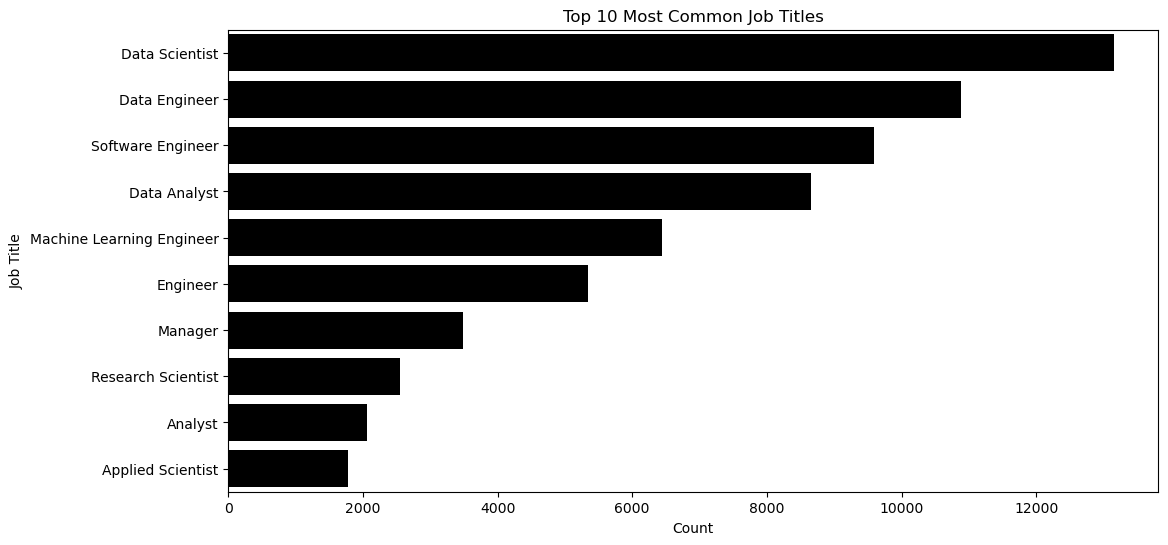

In [99]:
# 1. Countplot: Job Title Distribution 
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='job_title', order=df['job_title'].value_counts().index[:10],color='black')
plt.title("Top 10 Most Common Job Titles")
plt.xlabel("Count")
plt.ylabel("Job Title")

plt.show()


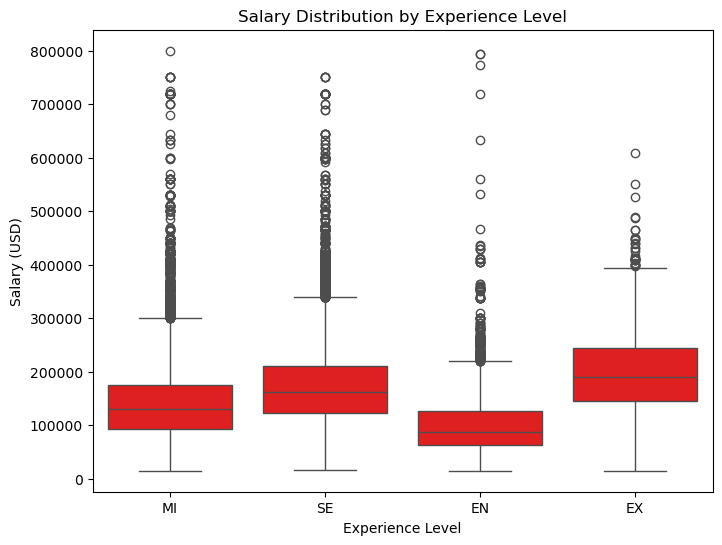

In [100]:
##2. Boxplot: Salary vs. Experience Level

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd',color='red')
plt.title("Salary Distribution by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.show()


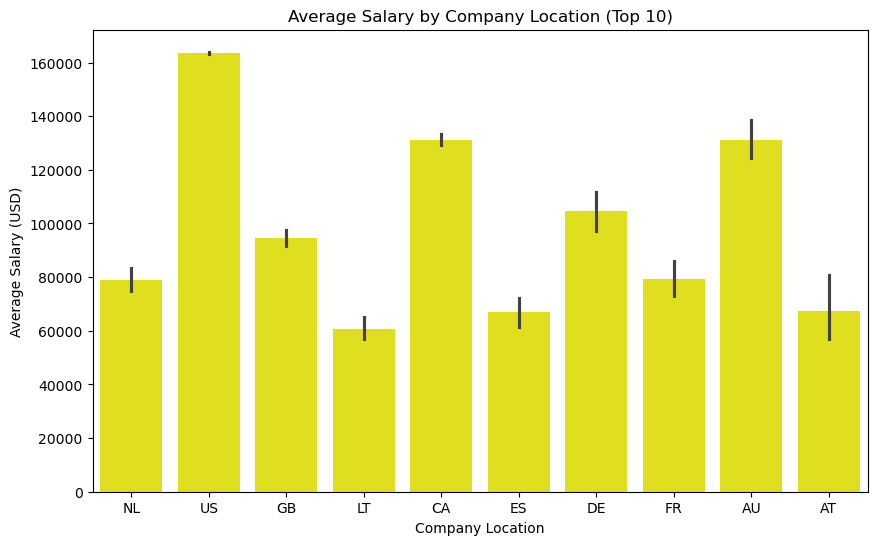

In [101]:
##3.Barplot: Average Salary by Company Location
top_locations = df['company_location'].value_counts().index[:10]
plt.figure(figsize=(10,6))
sns.barplot(data=df[df['company_location'].isin(top_locations)],
            x='company_location', y='salary_in_usd',color='yellow')
plt.title("Average Salary by Company Location (Top 10)")
plt.xlabel("Company Location")
plt.ylabel("Average Salary (USD)")
plt.show()


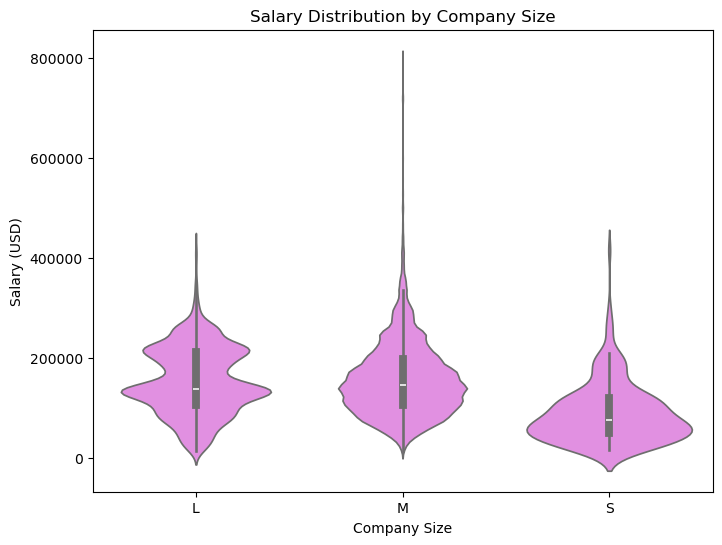

In [102]:
##  4. Violin Plot: Salary vs. Company Size

plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='company_size', y='salary_in_usd',color='violet')
plt.title("Salary Distribution by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Salary (USD)")
plt.show()


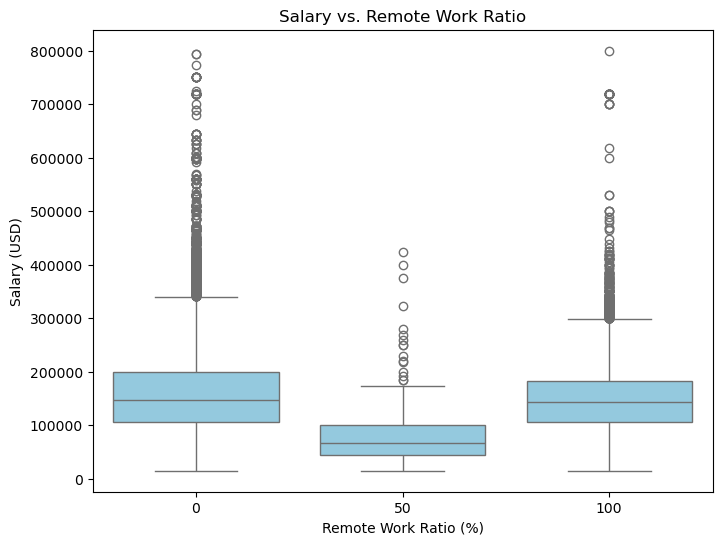

In [103]:
## 5. Boxplot: Salary by Remote Work Ratio
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='remote_ratio', y='salary_in_usd',color='skyblue')
plt.title("Salary vs. Remote Work Ratio")
plt.xlabel("Remote Work Ratio (%)")
plt.ylabel("Salary (USD)")
plt.show()


C:\Users\MOHAMMED YAZIN N\AppData\Local\Temp\ipykernel_21840\4281714814.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='work_year', y='salary_in_usd',ci=None)


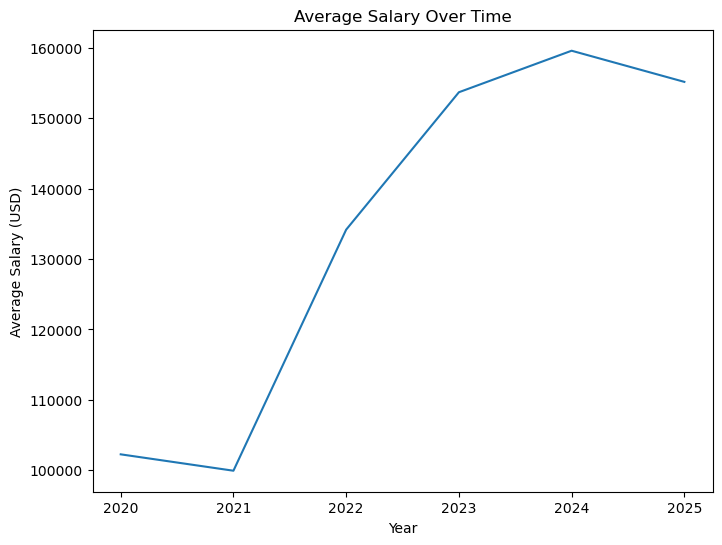

In [104]:
## 6.Trend Over Time 
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x='work_year', y='salary_in_usd',ci=None)
plt.title("Average Salary Over Time")
plt.xlabel("Year")
plt.ylabel("Average Salary (USD)")
plt.show()


### 3️⃣ Stage 3️: Data Preprocessing

In [105]:
## Seperating categorical columns 
cat_columns= df[[
'experience_level',
'employment_type',
'job_title',
'employee_residence',
'company_location',
'company_size'
]]

cat_columns

,experience_level,employment_type,job_title,employee_residence,company_location,company_size
0,MI,FT,Customer Success Manager,NL,NL,L
1,SE,FT,Engineer,US,US,M
2,SE,FT,Engineer,US,US,M
3,SE,FT,Applied Scientist,US,US,M
4,SE,FT,Applied Scientist,US,US,M
...,...,...,...,...,...,...
88579,SE,FT,Data Scientist,US,US,L
88580,MI,FT,Principal Data Scientist,US,US,L
88581,EN,FT,Data Scientist,US,US,S
88582,EN,CT,Business Data Analyst,US,US,L


In [106]:
## Seperating numerical columns 

num_columns= df.drop(columns=[
'experience_level',
'employment_type',
'job_title',
'employee_residence',
'company_location',
'company_size'
])

num_columns

,work_year,salary_in_usd,remote_ratio
0,2025,60000,50
1,2025,165000,0
2,2025,109000,0
3,2025,294000,0
4,2025,137600,0
...,...,...,...
88579,2020,412000,100
88580,2021,151000,100
88581,2020,105000,100
88582,2020,100000,100


In [107]:
## checking Outliers 
for  col in num_columns :
    Q1= df[col].quantile(0.25)
    Q3= df[col].quantile(0.75)
    print(f"{col} ---> Q1 = {Q1}, Q3 = {Q3}")
   

work_year ---> Q1 = 2024.0, Q3 = 2024.0
salary_in_usd ---> Q1 = 106097.25, Q3 = 198600.0
remote_ratio ---> Q1 = 0.0, Q3 = 0.0


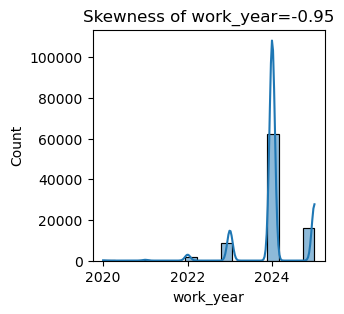

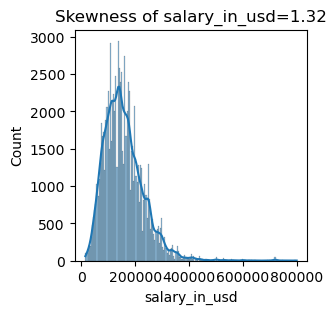

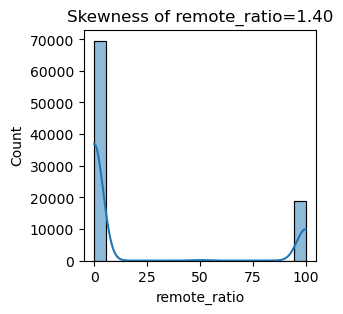

In [108]:
# skewness check
for col in num_columns:
    plt.figure(figsize=(3, 3))
    sns.histplot(df[col], kde=True)
    skew_value=df[col].skew()
    plt.title(f'Skewness of {col}={skew_value:.2f}')
    plt.show()

In [109]:
# Treating the  Target column Outlier using IQR

q1 = df['salary_in_usd'].quantile(0.25)
q3 = df['salary_in_usd'].quantile(0.75)

print('Q1 : ',q1)
print('Q3 : ',q3)



Q1 :  106097.25
Q3 :  198600.0


In [110]:
## Calculation of IQR for the outlier columns 

IQR = q3 - q1
print('IQR : ',IQR)


IQR :  92502.75


In [111]:
## Outlier treatment using IQR method (capping at 1.5 times IQR)

outliers_lower = Q1-1.5*IQR
outliers_upper = Q1+1.5*IQR



In [112]:
## to identify the outlier


df[(df['salary_in_usd']<outliers_lower) | (df['salary_in_usd']>outliers_upper)]                                     

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2025,SE,FT,Engineer,165000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,US,0,US,M
7,2025,SE,FT,Software Development Engineer,149800,US,0,US,L
9,2025,SE,FT,Research Scientist,200000,US,0,US,M
10,2025,SE,FT,Research Scientist,185000,US,0,US,M
...,...,...,...,...,...,...,...,...,...
88574,2021,SE,FT,Data Scientist,168000,JP,0,JP,S
88576,2021,MI,FT,Applied Machine Learning Scientist,423000,US,50,US,L
88578,2021,SE,FT,Data Specialist,165000,US,100,US,L
88579,2020,SE,FT,Data Scientist,412000,US,100,US,L


In [113]:
## trimming the outiers


trimmed_df= df[(df['salary_in_usd']>=outliers_lower) & (df['salary_in_usd']<=outliers_upper)]
trimmed_df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,60000,NL,50,NL,L
2,2025,SE,FT,Engineer,109000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,US,0,US,M
5,2025,EN,FT,Data Analyst,82000,US,0,US,M
6,2025,EN,FT,Data Analyst,44000,US,0,US,M
...,...,...,...,...,...,...,...,...,...
88575,2021,MI,FT,Data Scientist,119059,SG,100,IL,M
88577,2021,MI,FT,Data Engineer,28369,MT,50,MT,L
88581,2020,EN,FT,Data Scientist,105000,US,100,US,S
88582,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


#### Data Encoding: Converting categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

In [114]:
## initialising one hot encoder 
ohe=OneHotEncoder(sparse_output=False )

In [115]:
# Fit and transform the data 
encoded= ohe.fit_transform(cat_columns)
encoded

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [116]:
encoded_df=pd.DataFrame(encoded,columns=ohe.get_feature_names_out(ohe.feature_names_in_))
encoded_df

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Architect,job_title_AI Data Engineer,...,company_location_UA,company_location_US,company_location_VE,company_location_VN,company_location_XK,company_location_ZA,company_location_ZM,company_size_L,company_size_M,company_size_S
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88579,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
88580,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
88581,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
88582,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [117]:
## Adding new DataFrame to the Old Numeric Data

new_df=pd.concat([encoded_df , num_columns],axis=1)
new_df

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Architect,job_title_AI Data Engineer,...,company_location_VN,company_location_XK,company_location_ZA,company_location_ZM,company_size_L,company_size_M,company_size_S,work_year,salary_in_usd,remote_ratio
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2025,60000,50
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2025,165000,0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2025,109000,0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2025,294000,0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2025,137600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88579,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2020,412000,100
88580,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2021,151000,100
88581,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2020,105000,100
88582,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2020,100000,100


In [118]:
## Checking the data types 

new_df.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

In [119]:
## Seperating the Inputs 
X= new_df.drop(['salary_in_usd'],axis=1)
X

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Architect,job_title_AI Data Engineer,...,company_location_VE,company_location_VN,company_location_XK,company_location_ZA,company_location_ZM,company_size_L,company_size_M,company_size_S,work_year,remote_ratio
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2025,50
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2025,0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2025,0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2025,0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2025,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88579,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2020,100
88580,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2021,100
88581,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2020,100
88582,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2020,100


In [120]:
y= new_df['salary_in_usd']
y

0         60000
1        165000
2        109000
3        294000
4        137600
          ...  
88579    412000
88580    151000
88581    105000
88582    100000
88583     94665
Name: salary_in_usd, Length: 88584, dtype: int64

### Performing  Training and Testing to the dataset 

In [121]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [122]:
X_train

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Architect,job_title_AI Data Engineer,...,company_location_VE,company_location_VN,company_location_XK,company_location_ZA,company_location_ZM,company_size_L,company_size_M,company_size_S,work_year,remote_ratio
83557,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2023,50
52852,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2024,0
64500,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2024,0
84917,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2023,0
76600,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2024,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2025,100
54886,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2024,0
76820,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2024,0
860,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2025,0


In [123]:
X_test

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Architect,job_title_AI Data Engineer,...,company_location_VE,company_location_VN,company_location_XK,company_location_ZA,company_location_ZM,company_size_L,company_size_M,company_size_S,work_year,remote_ratio
24134,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2024,0
37468,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2024,0
84508,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2023,0
12635,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2025,0
87261,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2022,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68457,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2024,0
74772,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2024,0
52888,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2024,0
15798,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2025,0


In [124]:
y_train

83557     67419
52852    200000
64500    177000
84917    105380
76600     55200
          ...  
6265     200000
54886    560000
76820    120000
860       89250
15795    161000
Name: salary_in_usd, Length: 70867, dtype: int64

In [125]:
y_test

24134     90000
37468     66000
84508    196000
12635    175500
87261    192564
          ...  
68457     32332
74772     75300
52888    144900
15798    240400
71584    100000
Name: salary_in_usd, Length: 17717, dtype: int64

#### Feature Scaling:

#### After the process of encoding, we perform the scaling of the features using standardscaler or minmaxscale

In [126]:

## initialsing Scaler

scaler= StandardScaler()



In [127]:
scaled_std=scaler.fit_transform(new_df)
scaled_std

array([[-0.32326048, -0.14640892,  1.52046013, ...,  1.55592176,
        -1.32689415,  0.70324358],
       [-0.32326048, -0.14640892, -0.65769564, ...,  1.55592176,
         0.10107582, -0.52132257],
       [-0.32326048, -0.14640892, -0.65769564, ...,  1.55592176,
        -0.66050817, -0.52132257],
       ...,
       [ 3.09348053, -0.14640892, -0.65769564, ..., -6.50382756,
        -0.71490702,  1.92780973],
       [ 3.09348053, -0.14640892, -0.65769564, ..., -6.50382756,
        -0.78290559,  1.92780973],
       [-0.32326048, -0.14640892, -0.65769564, ..., -4.89187769,
        -0.85546007,  0.70324358]])

In [128]:
## Converting into an Dataframe 

scaled_df= pd.DataFrame(scaled_std,columns=new_df.columns)
scaled_df

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Architect,job_title_AI Data Engineer,...,company_location_VN,company_location_XK,company_location_ZA,company_location_ZM,company_size_L,company_size_M,company_size_S,work_year,salary_in_usd,remote_ratio
0,-0.323260,-0.146409,1.520460,-1.181075,-0.050350,-0.013441,0.073268,-0.051354,-0.043199,-0.004752,...,-0.00672,-0.004752,-0.02625,-0.00336,5.636708,-5.419242,-0.049210,1.555922,-1.326894,0.703244
1,-0.323260,-0.146409,-0.657696,0.846686,-0.050350,-0.013441,0.073268,-0.051354,-0.043199,-0.004752,...,-0.00672,-0.004752,-0.02625,-0.00336,-0.177409,0.184528,-0.049210,1.555922,0.101076,-0.521323
2,-0.323260,-0.146409,-0.657696,0.846686,-0.050350,-0.013441,0.073268,-0.051354,-0.043199,-0.004752,...,-0.00672,-0.004752,-0.02625,-0.00336,-0.177409,0.184528,-0.049210,1.555922,-0.660508,-0.521323
3,-0.323260,-0.146409,-0.657696,0.846686,-0.050350,-0.013441,0.073268,-0.051354,-0.043199,-0.004752,...,-0.00672,-0.004752,-0.02625,-0.00336,-0.177409,0.184528,-0.049210,1.555922,1.855439,-0.521323
4,-0.323260,-0.146409,-0.657696,0.846686,-0.050350,-0.013441,0.073268,-0.051354,-0.043199,-0.004752,...,-0.00672,-0.004752,-0.02625,-0.00336,-0.177409,0.184528,-0.049210,1.555922,-0.271556,-0.521323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88579,-0.323260,-0.146409,-0.657696,0.846686,-0.050350,-0.013441,0.073268,-0.051354,-0.043199,-0.004752,...,-0.00672,-0.004752,-0.02625,-0.00336,5.636708,-5.419242,-0.049210,-6.503828,3.460205,1.927810
88580,-0.323260,-0.146409,1.520460,-1.181075,-0.050350,-0.013441,0.073268,-0.051354,-0.043199,-0.004752,...,-0.00672,-0.004752,-0.02625,-0.00336,5.636708,-5.419242,-0.049210,-4.891878,-0.089320,1.927810
88581,3.093481,-0.146409,-0.657696,-1.181075,-0.050350,-0.013441,0.073268,-0.051354,-0.043199,-0.004752,...,-0.00672,-0.004752,-0.02625,-0.00336,-0.177409,-5.419242,20.321022,-6.503828,-0.714907,1.927810
88582,3.093481,-0.146409,-0.657696,-1.181075,19.861125,-0.013441,-13.648487,-0.051354,-0.043199,-0.004752,...,-0.00672,-0.004752,-0.02625,-0.00336,5.636708,-5.419242,-0.049210,-6.503828,-0.782906,1.927810


In [129]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

 ### 4️⃣ Stage 4: Model Building and Evaluation 

#### 📌 Model Building Approach

To ensure robust and accurate predictions, multiple regression algorithms will be implemented and compared.  
The selected models represent a mix of simple, tree-based, and ensemble methods, providing diversity in learning approaches.  
The following models from the `scikit-learn` library will be used:

- **LinearRegression** 
  A baseline linear model to establish a reference performance.

- **DecisionTreeRegressor**   
  A non-linear model that splits data into branches based on feature values.

- **RandomForestRegressor**   
  An ensemble of decision trees to improve prediction accuracy and reduce overfitting.

- **Support Vector Regressor (SVR)**  
  A kernel-based method effective for capturing complex relationships in the data.

- **HistGradientBoostingRegressor**


  A fast and efficient gradient boosting algorithm that uses histograms to split continuous features into bins, which reduces memory usage and speeds up     training, making it highly suitable for large datasets.

Each model will be trained, evaluated, and compared using relevant regression performance metrics (e.g., RMSE, MAE, R²) to identify the best-performing algorithm for the given dataset.


In [130]:
## Importing Necessary Model Building Algorithms (Regression)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

## For Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [131]:
# Model building
results=[]

def build_model(model,model_name ,X_train, y_train, X_test, y_test):
    print(f"Training model_name : {model_name}")
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model)
    print("---------------------------------------------------------------")
    results.append({
        "Model_name " : model_name,
        "R2_score" : round(r2_score(y_test, y_pred),4),
        "MSE": round(mean_squared_error(y_test, y_pred),4),
        "MAE": round(mean_absolute_error(y_test, y_pred),4)})
    
    # Evaluate performance
    print(f"R2_score:\n : {r2_score(y_test, y_pred):.4f}")
    print(f"MSE :\n: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"MAE:\n :{mean_absolute_error(y_test, y_pred):.4f}")



In [132]:
# Train a linear regression model
lr_model=LinearRegression()

build_model(lr_model,"Linear_Regression",X_train, y_train, X_test, y_test)

Training model_name : Linear_Regression
LinearRegression()
---------------------------------------------------------------
R2_score:
 : 0.2776
MSE :
: 3989993304.5697
MAE:
 :46093.2969


In [133]:
# Train a DecisionTreeRegressor  model
dtree_model=DecisionTreeRegressor()

build_model(dtree_model,"Decision Tree Regressor",X_train, y_train, X_test, y_test)

Training model_name : Decision Tree Regressor
DecisionTreeRegressor()
---------------------------------------------------------------
R2_score:
 : 0.2839
MSE :
: 3955057883.5972
MAE:
 :45703.1930


In [134]:
# Train a KNeighborsRegressor model
KN_model=KNeighborsRegressor()

build_model(KN_model,"KNeighborsRegressor",X_train, y_train, X_test, y_test)

Training model_name : KNeighborsRegressor
KNeighborsRegressor()
---------------------------------------------------------------
R2_score:
 : 0.1933
MSE :
: 4455425056.7728
MAE:
 :48331.8296


In [135]:
# Train a RandomForestRegressor model (optimised settings to speed up RFR)
rfr_model=RandomForestRegressor(n_estimators=50,max_depth=15,n_jobs=-1,random_state=42)

build_model(rfr_model,"RandomForestRegressor",X_train, y_train, X_test, y_test)

Training model_name : RandomForestRegressor
RandomForestRegressor(max_depth=15, n_estimators=50, n_jobs=-1, random_state=42)
---------------------------------------------------------------
R2_score:
 : 0.2746
MSE :
: 4006232955.1938
MAE:
 :46195.4308


In [136]:
# Train a HistGradientBoostingRegressor model 
hgbr_model=HistGradientBoostingRegressor()

build_model(hgbr_model,"HistGradientBoostingRegressor",X_train, y_train, X_test, y_test)

Training model_name : HistGradientBoostingRegressor
HistGradientBoostingRegressor()
---------------------------------------------------------------
R2_score:
 : 0.2889
MSE :
: 3927627926.9901
MAE:
 :45584.9925


In [137]:
## Creating a Dataframe out of the possible outputs

results_df= pd.DataFrame(results).sort_values(by='R2_score',ascending=False)
results_df


## Best Model: HistGradient Boosting Regressor !

,Model_name,R2_score,MSE,MAE
4,HistGradientBoostingRegressor,0.2889,3.927628e+09,45584.9925
1,Decision Tree Regressor,0.2839,3.955058e+09,45703.1930
0,Linear_Regression,0.2776,3.989993e+09,46093.2969
3,RandomForestRegressor,0.2746,4.006233e+09,46195.4308
2,KNeighborsRegressor,0.1933,4.455425e+09,48331.8296


In [138]:
## 📊 Model Performance Summary

best_model=results_df.loc[results_df['R2_score'].idxmax()]
best_model


Model_name     HistGradientBoostingRegressor
R2_score                              0.2889
MSE                          3927627926.9901
MAE                               45584.9925
Name: 4, dtype: object

In [139]:
worst_model=results_df.loc[results_df['R2_score'].idxmin()]
worst_model

Model_name     KNeighborsRegressor
R2_score                    0.1933
MSE                4455425056.7728
MAE                     48331.8296
Name: 2, dtype: object

## 🔎 Key Observations

**📌Best Model*:

The  **HistGradientBoostingRegressor** achieved the highest R² score (0.2883) and the lowest MSE, making it the best-performing model among those tested.

It indicates that this model explains about 28.8% of the variance in salaries.

**📌Close Competition:*

**Decision Tree**, **Linear Regression**, and **Random Forest** models all performed similarly, with R² scores around 0.27–0.28.

Their error values (MSE, MAE) were also in the same range, suggesting that none of them significantly outperformed the others.

**📌Weak Performer*:

The **KNeighbors Regressor** performed the worst, with an R² of only 0.19, indicating poor generalization capability for this dataset.

**📌 Interpretation*

An R² around 0.28 suggests that the models capture only a moderate portion of salary variability.

This is acceptable in real-world datasets, especially when predicting salaries where many hidden or unmeasured factors (e.g., individual skills, negotiation, company policies) affect the outcome.

### 5️⃣ Stage 5 :Hyperparameter Tuning with Randomized Search CV

 Instead of testing all 243 combos, we can just test, say, 30 random ones.
 As the dataset is much heavier , we cant rely on GridSearch CV , instead using Randomized Search CV which is much faster, still usually finds a good set of params.

In [140]:
from sklearn.model_selection import RandomizedSearchCV

In [141]:
## Definining Model

hgb= HistGradientBoostingRegressor()

## Defining Parameters
param_grid = {
    "learning_rate": [0.01, 0.05, 0.1],   # 3 values
    "max_iter": [100, 200, 500],          # 3 values
    "max_leaf_nodes": [15, 31, 63],       # 3 values
    "min_samples_leaf": [10, 20, 30],     # 3 values            #Total = 3 × 3 × 3 × 3 × 3 = 243 combos
    "l2_regularization": [0.0, 0.1, 1.0]  # 3 values
}

## Randomized Search CV

random_search = RandomizedSearchCV(
    estimator=hgb,
    param_distributions=param_grid,
    n_iter=30,        # test only 30 random combos
    cv=3,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    random_state=42
)

#Fitt Random_Search
random_search.fit(X_train, y_train)



## Finding Best parameters and Best Score
print("Best Params:", random_search.best_params_)
print("Best CV R2 ", random_search.best_score_)




Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Params: {'min_samples_leaf': 10, 'max_leaf_nodes': 63, 'max_iter': 200, 'learning_rate': 0.1, 'l2_regularization': 0.1}
Best CV R2  0.29971225800240003


In [142]:
# Evaluate on Test Data
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Test R² Score:", r2_score(y_test, y_pred))                ## Test R² ≈ CV R² =  model is generalizing well(no overfitting )



Test R² Score: 0.29405441297775625


### 6️⃣ Stage 6: Prediction  
 #### Predictions On New Unseen Data

Suppose  having a new DataFrame "new_data" with the same features as the training data (without the target column)

In [143]:
# Example Run to make predictions

## new_predict=best_model.predict(new_data)
# print("Predcitions for new data: ",new_predict)
